In [1]:
%load_ext autoreload
%autoreload 2
import os; import sys;src_dir = os.path.join(os.getcwd(), os.pardir, 'src');sys.path.append(src_dir)

In [2]:
import visualization.visualize as vis
import pandas as pd
#import data.rawdal as dal
import matplotlib.pyplot as plt
import numpy as np
import data.split as split
import config
import tqdm
from data.dal import DAL

In [3]:
dal = DAL("amie-kinect-data.hdf")
ov = dal.overview()

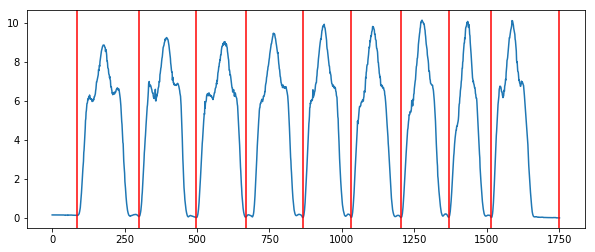

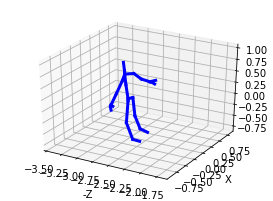

In [5]:
j=0
rows = ov
for i in range(j,j+1):
    execs = split.split(dal.get(rows.df_key.values[j]).reset_index(drop=True),
                cmpframe=-1,
                distfactor=2,
                #add_start = True,
                #add_end=True,
                show=True)
vis.kinect.stickfigureplot(execs[0],figsize=0.5,linewidth=3)

In [6]:
splitdf = "../data/split.hdf"

def add_exercises(data):
    cnt = 0
    overview = []
    for row,exercises in data:
        cnt = cnt - cnt % 100
        cnt += 100
        for exercise in exercises:
            cnt += 1
            key = "skeleton_%d" % cnt
            overview.append({'person':row.person,
                            'exercise':row.exercise,
                            'execution_type':row.execution_type,
                            'df_key':key})
            exercise.to_hdf(splitdf,key=key)
    overview = pd.DataFrame(overview)
    overview.to_hdf(splitdf,key='overview')

In [7]:
%%time
ov = dal.overview()
rows = list(ov.itertuples())
data = []
for i in tqdm.tqdm(range(0,len(rows))):
    row = rows[i]
    start = 0
    end = None
    cmpframe = 0
    distfactor = 1.5
    add_end=False
    add_start=False
    if i == 3:
        end = 1300
        distfactor = 2
    if i == 5:
        end = 1100
    if i == 6:
        add_end=True
    if i in [18,57,79,142]:
        add_start=True
    if i in [19,20,21,22,23,14,26,28,31,32,33,34,36,37, 
               41,42,46, 
               60,61,71,
               76,77,78,80,81, # ?
               108,112,114,115,117,118, # ?
               123,125,126,127,128,130,131,132,133,134,135,138,
               144,146,148,149,150,151,152,154,156,164,165,166,
               170,171,172,173,174,180,181,182,183
              ]:
        cmpframe=-1
    if i in [24]:
        end = 1550
    if i in [29,113]:
        cmpframe=210
    if i in [30,35,143,158]:
        cmpframe=200
    if i in [44]:
        distfactor=3
    if i in [45]:
        distfactor=2
    if i in [54,169]:
        cmpframe=240
    if i in [61]:
        start=100
    if i in [62]:
        cmpframe=-60
    if i in [70]:
        end=750
    if i in [72]:
        cmpframe=60
    if i in [109,110,111]:
        cmpframe=160
    if i in [116]:
        cmpframe=190
    if i in [129]:
        start=200
    if i in [136]:
        end=670
    if i in [137]:
        end=900
    if i in [142,145,153,155,162,163,167]:
        cmpframe=-30
    if i in [175,185]:
        end=1700
    exes = split.split(dal.get(row.df_key)[start:end].reset_index(drop=True),
                       cmpframe=cmpframe,
                       distfactor=distfactor,
                       add_start=add_start,
                       add_end=add_end)
    data.append((row,exes))

add_exercises(data)

100%|██████████| 186/186 [00:06<00:00, 27.24it/s]


CPU times: user 38.3 s, sys: 6.37 s, total: 44.6 s
Wall time: 44.6 s
